# Project: Investigate a Dataset - [TMDB Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The [TMDB Movie Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata) consists of 10866 rows and 21 columns. The following are the column names and descriptions:

- id: The ID of the movie                  
- imdb_id: The Id assigned by IMDB
- popularity: The popular rating of the movie
- budget: The budget allocated in USD dollars
- revenue: The revenue generated by the movie
- original_title: The original title of the movie
- cast: The movie cast
- homepage: The home url of the movie
- director: The director of the movie
- tagline: The tagline of the movie
- keywords: The keywords associated with the movie
- overview: A summary/overview of the movie
- runtime: The runtime of the movie in minutes
- genres: The movie genre
- production_companies: The companies who produced the movie
- release_date: The release date of the movie
- vote_count: The total number of votes the movie got
- vote_average: The average vote for the movie
- release_year: The year the movie was released
- budget_adj: The budget adjusted for inflation
- revenue_adj: The revenue adjusted for inflation


### Question(s) for Analysis

What are some of the factors that could influence the popularity of a movie? Specifically,

- Are newer movies more popular than old movies?
- Is More Spending/Budget Associated With Increased Popularity?
- Are Longer Running Movies More Popular?

In [1]:
# load the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**

In [3]:
# Load the data
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

In [4]:
# View the first-three rows
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
# inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# count the number of missing values in each column/variable
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# display numerical summary stats of some variables
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning

- Some columns are irrelevant to my data exploration/analysis.
- There were some missing values in some columns - director, genre, keywords and so on.
- Release date is a string instead of a datetime
- Some movies have a minimum runtime of zero (0) and zero budget and or zero revenue

In [8]:
# drop some irrelevant columns
cols_to_drop = ['cast', 'homepage', 'overview']

df.drop(cols_to_drop, axis=1, inplace=True)

In [9]:
# confirm the removal of some columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'director', 'tagline', 'keywords', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

**The columns with missing values can be ignored during this tentative analysis**

In [10]:
# convert from string to datetime
df.release_date = pd.to_datetime(df.release_date)

In [11]:
# confirm the type
df.release_date.dtypes

dtype('<M8[ns]')

The release date column is now a datetime variable

In [12]:
# remove movies with zero runtime and zero/1 dollor budget budget
df = df[df.runtime > 0]
df = df[df.budget > 0]
df = df[df.budget > 1]

In [13]:
# confirm
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5163.000000,5163.000000,5.163000e+03,5.163000e+03,5163.000000,5163.000000,5163.000000,5163.000000,5.163000e+03,5.163000e+03
mean,45431.300988,0.993273,3.077893e+07,8.038450e+07,107.164827,409.088127,6.033566,2001.244238,3.693533e+07,1.023142e+08
std,72614.632673,1.329779,3.891213e+07,1.595556e+08,22.674946,788.667329,0.883140,11.779922,4.196541e+07,1.960021e+08
min,5.000000,0.001117,2.000000e+00,0.000000e+00,4.000000,10.000000,1.500000,1960.000000,2.908194e+00,0.000000e+00
25%,8838.500000,0.348243,6.000000e+06,0.000000e+00,93.000000,36.000000,5.500000,1996.000000,8.131203e+06,0.000000e+00
50%,12919.000000,0.625188,1.700000e+07,2.102876e+07,103.000000,122.000000,6.100000,2005.000000,2.278180e+07,2.882781e+07
75%,44904.000000,1.154514,4.000000e+07,8.965614e+07,117.000000,402.000000,6.600000,2010.000000,5.008384e+07,1.135097e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


There are no rows with zero budget

In [14]:
# 17 movies made less than a 100 dollars
df[df.revenue < 100].revenue.value_counts()

0     1310
16       3
11       3
2        2
5        2
6        2
15       2
23       1
46       1
13       1
12       1
27       1
30       1
42       1
3        1
43       1
78       1
Name: revenue, dtype: int64

In [15]:
df = df[df.revenue > 100]

In [16]:
# confirm
df[df.revenue < 100].revenue.value_counts()

Series([], Name: revenue, dtype: int64)

All low earning movies were removed

<a id='eda'></a>
## Exploratory Data Analysis

In [17]:
# scatter_plot

def scatter_plot(x, y = 'popularity', title = None, xlab = None, ylab = 'Popularity'):
    df.plot.scatter(x=x, y=y)
    if title is not None:
        plt.title(title)
    if xlab is not None:
        plt.xlabel(xlab)
    plt.ylabel(ylab)

### Research Question 1: Are newer movies more popular than old movies?

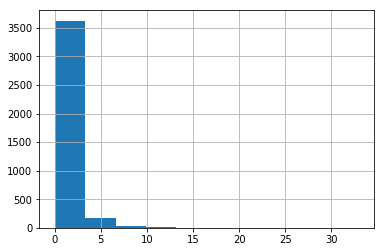

In [18]:
# popularity of movies
df.popularity.hist();

Most movies have popularity between 0 and 5. The distribution of popularity is also right-skewed

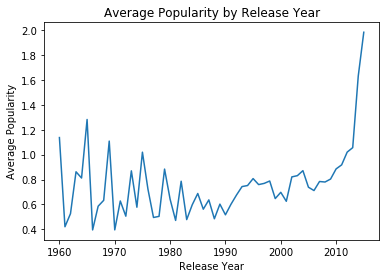

In [19]:
# popularity based on year (use median for robustness to outliers)
df.groupby('release_year').popularity.median().plot();

plt.title('Average Popularity by Release Year')
plt.ylabel('Average Popularity')
plt.xlabel('Release Year');

Movies made after 2010 appear to have more popularity relative to other years. As shown below, there is a weak correlation between release year and popularity

In [20]:
df[['release_year', 'popularity']].corr('spearman')

,release_year,popularity
release_year,1.00000,0.24884
popularity,0.24884,1.00000


We can also inspect the popularity of 21st-century movies relative to 20th century

In [21]:
# create a new variable
df['21st_Century'] = df.release_year >= 2000

In [22]:
# get the average popularity by century
df.groupby('21st_Century').popularity.median()

21st_Century
False    0.663483
True     0.899324
Name: popularity, dtype: float64

21st-century movies were more popular than 20th-century movies



### Research Question 2: Is More Spending/Budget Associated With Increased Popularity?

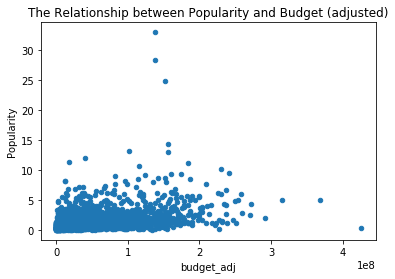

In [23]:
# take the log of popularity
df['log_popularity'] = np.log(df.popularity)

scatter_plot('budget_adj', 'popularity', title='The Relationship between Popularity and Budget (adjusted)');

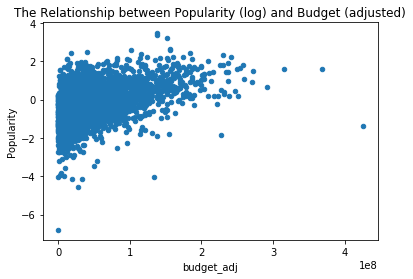

In [24]:
scatter_plot('budget_adj', 'log_popularity', title='The Relationship between Popularity (log) and Budget (adjusted)');

In [25]:
df[['budget_adj', 'popularity']].corr('spearman')

,budget_adj,popularity
budget_adj,1.000000,0.436261
popularity,0.436261,1.000000


In [26]:
df[['budget_adj', 'log_popularity']].corr()

,budget_adj,log_popularity
budget_adj,1.000000,0.432696
log_popularity,0.432696,1.000000


Popularity appeared to increase with increased spending. The relationship is more apparent after taking the log of popularity as shown above.

### Research Question 3: Are Longer Running Movies More Popular?

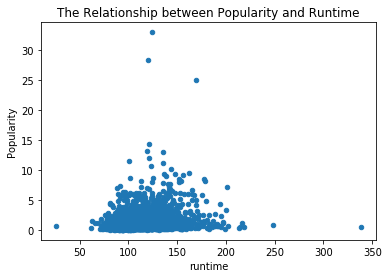

In [27]:
scatter_plot('runtime', 'popularity', title='The Relationship between Popularity and Runtime');

In [28]:
df[['runtime', 'popularity']].corr()

,runtime,popularity
runtime,1.000000,0.214223
popularity,0.214223,1.000000


Longer movies seemed to have popularity than shorter ones. Outliers can also be observed.

<a id='conclusions'></a>
## Conclusions

**Note:** This is a tentative analysis. No inferential statistical tests were performed to confirm the assumptions made during exploration (limitation).

Further exploration could be carried out on profit and the factors than influence it.

The following were the findings:

- Newer movies appeared to be more popular than older ones on average.
- An increase in movie budget appeared to be associated with an increase in popularity.
- Longer movies also appeared to popular than shorter ones.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0